# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import io


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_of_cities = len(cities)
len(cities)
no_of_cities

625

In [3]:
city_dictionary ={
    "city": cities,
    "country": "",
    "latitude": "",
    "longitude": "",
    "humidity": "",
    "cloudiness": "",
    "windspeed":"",
    "temperature": ""
                 }    

new_cities_df = pd.DataFrame(city_dictionary)

new_cities_df.head()


,city,country,latitude,longitude,humidity,cloudiness,windspeed,temperature
0,russkiy,,,,,,,
1,manavalakurichi,,,,,,,
2,dikson,,,,,,,
3,saint-philippe,,,,,,,
4,saint anthony,,,,,,,


In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

units="imperial"
 
call_url = f"{base_url}appid={weather_api_key}&units={units}&q="    
print(call_url)
# Use iterrows to iterate through pandas dataframe
for index, row in new_cities_df.iterrows():
 
    # Get city from df
    city = row['city']
   
    
    # Make API Call
   
    print(f"Retrieving Results for OpenWeather City Weather {index}.")
    response = requests.get(call_url + city).json()
    time.sleep(.15)
    
    # Get Results
    results = response['cod']
    
    try:
        print(f"City found is " + city + " with ID: " , response['id'] ) 
        
        new_cities_df.loc[index, 'country'] = response['sys']['country']
        new_cities_df.loc[index, 'latitude'] = response['coord']['lat']
        new_cities_df.loc[index, 'longitude'] = response['coord']['lon']
        new_cities_df.loc[index, 'humidity'] = response['main']['humidity']
        new_cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        new_cities_df.loc[index, 'windspeed'] = response['wind']['speed']
        new_cities_df.loc[index, 'temperature'] = response['main']['temp']
        
        
    except (KeyError, IndexError):
        print("City weather not available")
        
    print("------------")    
    
    
    

https://api.openweathermap.org/data/2.5/weather?appid=0ac0eac101cf8a0c8a650109048ee65a&units=imperial&q=
Retrieving Results for OpenWeather City Weather 0.
City found is russkiy with ID:  2017364
------------
Retrieving Results for OpenWeather City Weather 1.
City found is manavalakurichi with ID:  1263942
------------
Retrieving Results for OpenWeather City Weather 2.
City found is dikson with ID:  1507390
------------
Retrieving Results for OpenWeather City Weather 3.
City found is saint-philippe with ID:  935215
------------
Retrieving Results for OpenWeather City Weather 4.
City found is saint anthony with ID:  5044290
------------
Retrieving Results for OpenWeather City Weather 5.
City found is bethel with ID:  5282297
------------
Retrieving Results for OpenWeather City Weather 6.
City found is kenai with ID:  5866063
------------
Retrieving Results for OpenWeather City Weather 7.
City found is le port with ID:  935616
------------
Retrieving Results for OpenWeather City Weather 

City found is faanui with ID:  4034551
------------
Retrieving Results for OpenWeather City Weather 78.
City found is hithadhoo with ID:  1282256
------------
Retrieving Results for OpenWeather City Weather 79.
City found is ponta do sol with ID:  2264557
------------
Retrieving Results for OpenWeather City Weather 80.
City found is yulara with ID:  6355222
------------
Retrieving Results for OpenWeather City Weather 81.
City found is punta arenas with ID:  3874787
------------
Retrieving Results for OpenWeather City Weather 82.
City found is mataura with ID:  6201424
------------
Retrieving Results for OpenWeather City Weather 83.
City found is adrar with ID:  2381972
------------
Retrieving Results for OpenWeather City Weather 84.
City found is laguna with ID:  5364271
------------
Retrieving Results for OpenWeather City Weather 85.
City found is thompson with ID:  6165406
------------
Retrieving Results for OpenWeather City Weather 86.
City found is ketchikan with ID:  5554428
-----

City found is arraial do cabo with ID:  3471451
------------
Retrieving Results for OpenWeather City Weather 156.
City found is quatre cocos with ID:  1106643
------------
Retrieving Results for OpenWeather City Weather 157.
City found is marsh harbour with ID:  3571913
------------
Retrieving Results for OpenWeather City Weather 158.
City found is kendari with ID:  1640344
------------
Retrieving Results for OpenWeather City Weather 159.
City found is yellowknife with ID:  6185377
------------
Retrieving Results for OpenWeather City Weather 160.
City found is tanout with ID:  2439155
------------
Retrieving Results for OpenWeather City Weather 161.
City found is maltahohe with ID:  3355624
------------
Retrieving Results for OpenWeather City Weather 162.
City found is sabalgarh with ID:  1257928
------------
Retrieving Results for OpenWeather City Weather 163.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 164.
City found is chuy with ID:  3443

City found is vila franca do campo with ID:  3372472
------------
Retrieving Results for OpenWeather City Weather 234.
City found is makat with ID:  608872
------------
Retrieving Results for OpenWeather City Weather 235.
City found is comodoro rivadavia with ID:  3860443
------------
Retrieving Results for OpenWeather City Weather 236.
City found is springfield with ID:  4409896
------------
Retrieving Results for OpenWeather City Weather 237.
City found is smirnykh with ID:  2121126
------------
Retrieving Results for OpenWeather City Weather 238.
City found is lishu with ID:  2036055
------------
Retrieving Results for OpenWeather City Weather 239.
City found is korla with ID:  1529376
------------
Retrieving Results for OpenWeather City Weather 240.
City found is buenos aires with ID:  3435910
------------
Retrieving Results for OpenWeather City Weather 241.
City found is awbari with ID:  2219235
------------
Retrieving Results for OpenWeather City Weather 242.
City found is novo c

City found is monchegorsk with ID:  525404
------------
Retrieving Results for OpenWeather City Weather 312.
City found is trat with ID:  1605277
------------
Retrieving Results for OpenWeather City Weather 313.
City found is tuatapere with ID:  2180815
------------
Retrieving Results for OpenWeather City Weather 314.
City found is sao sebastiao with ID:  3448257
------------
Retrieving Results for OpenWeather City Weather 315.
City found is coihaique with ID:  3894426
------------
Retrieving Results for OpenWeather City Weather 316.
City found is sfantu gheorghe with ID:  667303
------------
Retrieving Results for OpenWeather City Weather 317.
City found is eureka with ID:  5563397
------------
Retrieving Results for OpenWeather City Weather 318.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 319.
City found is ilulissat with ID:  3423146
------------
Retrieving Results for OpenWeather City Weather 320.
City found is asau with ID:  686090
-----

City found is biloela with ID:  2175819
------------
Retrieving Results for OpenWeather City Weather 389.
City found is buin with ID:  3897774
------------
Retrieving Results for OpenWeather City Weather 390.
City found is pombia with ID:  3170346
------------
Retrieving Results for OpenWeather City Weather 391.
City found is clyde river with ID:  5924351
------------
Retrieving Results for OpenWeather City Weather 392.
City found is berlevag with ID:  780687
------------
Retrieving Results for OpenWeather City Weather 393.
City found is ulladulla with ID:  2145554
------------
Retrieving Results for OpenWeather City Weather 394.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 395.
City found is belmonte with ID:  3470137
------------
Retrieving Results for OpenWeather City Weather 396.
City found is vidim with ID:  2013406
------------
Retrieving Results for OpenWeather City Weather 397.
City found is rongcheng with ID:  1797117
------------
Ret

City weather not available
------------
Retrieving Results for OpenWeather City Weather 467.
City found is port keats with ID:  2063039
------------
Retrieving Results for OpenWeather City Weather 468.
City found is geraldton with ID:  2070998
------------
Retrieving Results for OpenWeather City Weather 469.
City found is puerto madryn with ID:  3840092
------------
Retrieving Results for OpenWeather City Weather 470.
City found is popondetta with ID:  2088163
------------
Retrieving Results for OpenWeather City Weather 471.
City found is tripoli with ID:  2210247
------------
Retrieving Results for OpenWeather City Weather 472.
City found is dutse with ID:  2344245
------------
Retrieving Results for OpenWeather City Weather 473.
City found is cidreira with ID:  3466165
------------
Retrieving Results for OpenWeather City Weather 474.
City found is hirado with ID:  1862555
------------
Retrieving Results for OpenWeather City Weather 475.
City found is kavaratti with ID:  1267390
-----

City found is laguna de perlas with ID:  3618522
------------
Retrieving Results for OpenWeather City Weather 545.
City found is tsabong with ID:  932987
------------
Retrieving Results for OpenWeather City Weather 546.
City found is nanlong with ID:  1799908
------------
Retrieving Results for OpenWeather City Weather 547.
City found is ixtapa with ID:  4004293
------------
Retrieving Results for OpenWeather City Weather 548.
City weather not available
------------
Retrieving Results for OpenWeather City Weather 549.
City found is puerto del rosario with ID:  2512186
------------
Retrieving Results for OpenWeather City Weather 550.
City found is kangaatsiaq with ID:  3422683
------------
Retrieving Results for OpenWeather City Weather 551.
City found is darnah with ID:  87205
------------
Retrieving Results for OpenWeather City Weather 552.
City found is lulea with ID:  604490
------------
Retrieving Results for OpenWeather City Weather 553.
City found is paoua with ID:  2383523
-----

City weather not available
------------
Retrieving Results for OpenWeather City Weather 623.
City found is kyren with ID:  2021031
------------
Retrieving Results for OpenWeather City Weather 624.
City found is wheeling with ID:  4916311
------------


In [31]:
new_cities_df

,city,country,latitude,longitude,humidity,cloudiness,windspeed,temperature
0,russkiy,RU,43.0147,131.8642,67.0,74.0,10.92,1.26
1,manavalakurichi,IN,8.1333,77.3000,74.0,3.0,4.99,84.29
2,dikson,RU,73.5069,80.5464,97.0,98.0,14.16,-4.72
3,saint-philippe,RE,-21.3585,55.7679,94.0,100.0,29.51,79.59
4,saint anthony,US,45.0205,-93.2180,73.0,0.0,5.01,-2.25
...,...,...,...,...,...,...,...,...
619,kalangala,UG,-0.3089,32.2250,67.0,95.0,12.84,74.07
620,lafia,NG,8.4833,8.5167,8.0,3.0,1.21,98.22
621,cuamba,MZ,-14.8031,36.5372,71.0,42.0,2.19,81.88
623,kyren,RU,51.6828,102.1408,89.0,88.0,1.95,2.97


In [6]:
#Removing cities that were not found with 404 Error or have values on NA
nan_value = float("NaN")
new_cities_df.replace("", nan_value, inplace=True)

new_cities_df.dropna(subset = ["latitude"], inplace=True)
new_cities_df

,city,country,latitude,longitude,humidity,cloudiness,windspeed,temperature
0,russkiy,RU,43.0147,131.8642,67.0,74.0,10.92,1.26
1,manavalakurichi,IN,8.1333,77.3000,74.0,3.0,4.99,84.29
2,dikson,RU,73.5069,80.5464,97.0,98.0,14.16,-4.72
3,saint-philippe,RE,-21.3585,55.7679,94.0,100.0,29.51,79.59
4,saint anthony,US,45.0205,-93.2180,73.0,0.0,5.01,-2.25
...,...,...,...,...,...,...,...,...
619,kalangala,UG,-0.3089,32.2250,67.0,95.0,12.84,74.07
620,lafia,NG,8.4833,8.5167,8.0,3.0,1.21,98.22
621,cuamba,MZ,-14.8031,36.5372,71.0,42.0,2.19,81.88
623,kyren,RU,51.6828,102.1408,89.0,88.0,1.95,2.97


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
new_cities_df.to_csv("City_Data.csv",
                header = True)

                

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#check if there are any cities with >100% humidity
humidity_check = new_cities_df["humidity"].describe(include = "all")
print("The maximum humidity value is 100, so there is no humidity value over 100 in our data set")
humidity_check

 

The maximum humidity value is 100, so there is no humidity value over 100 in our data set


count    578.000000
mean      72.096886
std       22.727936
min        4.000000
25%       63.000000
50%       77.000000
75%       89.000000
max      100.000000
Name: humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

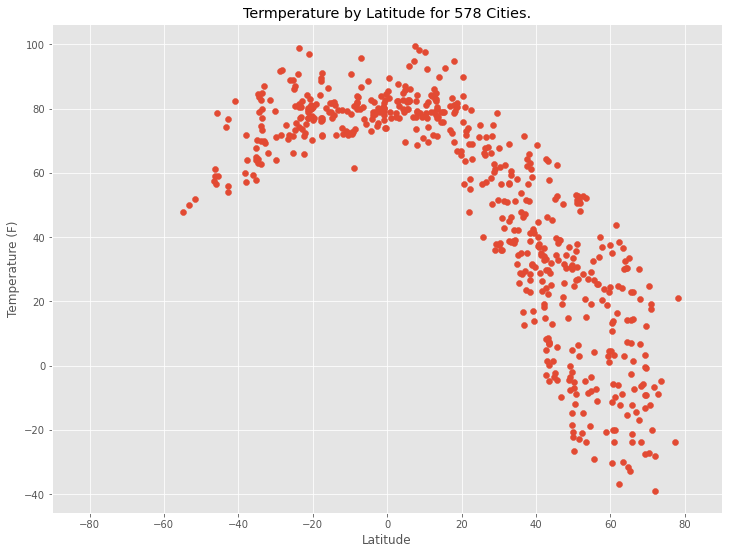

In [10]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size


# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["temperature"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.title(f"Termperature by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Temp_VS_Lat.png")
 

In [11]:
# This plot is showing the temperatures in random cities selected across the globe in late January based
# on the cities latitude.  The analysis # (as expected) that the temperatures gradually decrease in both the
# Northern and Southern hemisphere as you move away from the equator between 40 degrees latitude, and then
# decrease significantly in the Northen Hemisphere where they are experiencing winter.  
# Would expect to see a similar tail to the left if this was run in July in the Southern Hemisphere.

## Latitude vs. Humidity Plot

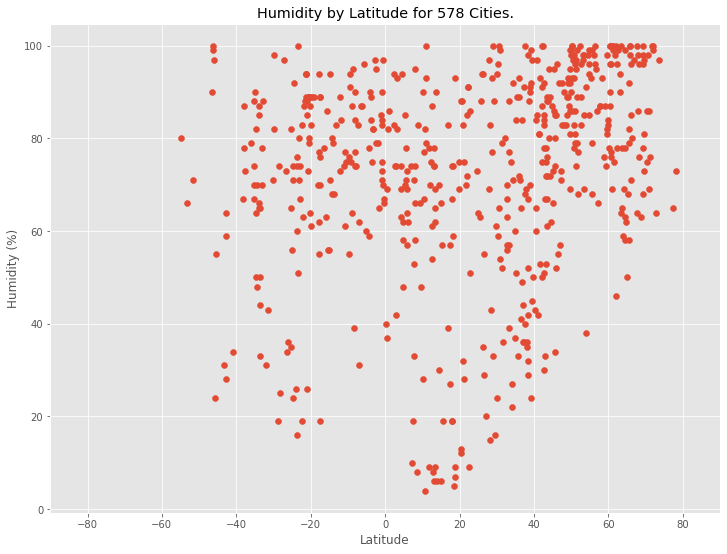

In [12]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)
plt.title(f"Humidity by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Humidity_VS_Lat.png")




In [13]:
# This chart is showing percent humidity by latitude for random cities selected across the globe.  It's  interesting 
# in that that most of the humidity values are in the 60 to 100% range with a cluster of values near 100% in the 
# Norther latutudes in the winter. This makes sense because the potential amount of water air can hold is lower at 
# lower temperatures so the denominator in the relative humidity equation is decreasing as the latitude increases.

## Latitude vs. Cloudiness Plot

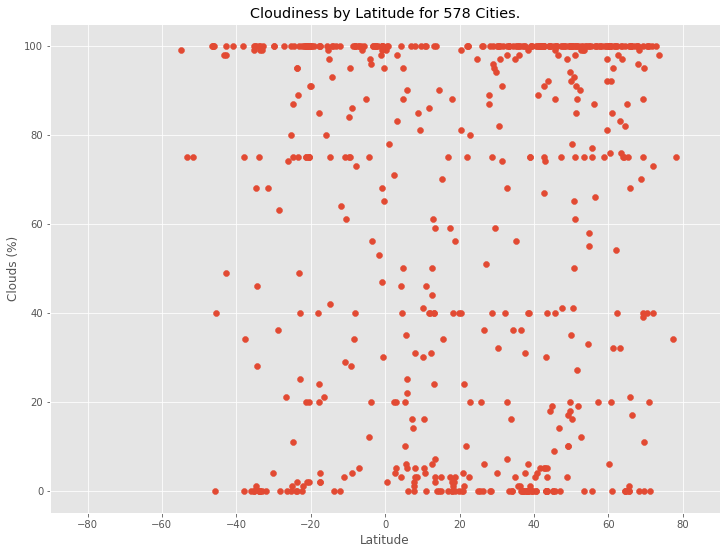

In [14]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot

plt.scatter(new_cities_df["latitude"], new_cities_df["cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")
plt.xlim(-90,90)
plt.title(f"Cloudiness by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Cloud_VS_Lat.png")


In [15]:
# The chart is measuring the percentage of clouds in the sky across randomly selected cities of different latitude. 
# One thing to note is that the results cluster on the upper and lower bounds which makes sense in that in many 
# cities on any given day given the weather there can be no clouds or complete cloud cover.

## Latitude vs. Wind Speed Plot

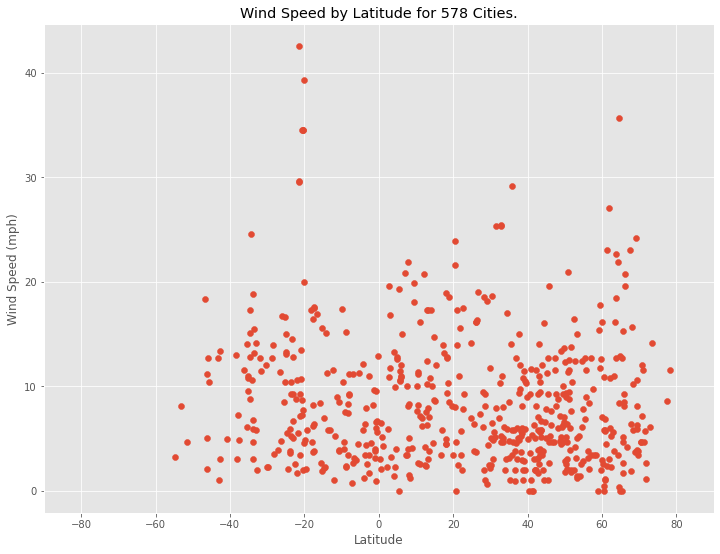

In [16]:
# Using ggplot 
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["windspeed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)
plt.title(f"Wind Speed by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Wind_VS_Lat.png")
 

In [17]:
# This chart is measureing wind speed for randomly selected cities across the globe.  It's showing that wind speeds
# tend to be between 0 and 10 mph across the globe and the season, summer or winter doesn't appear to have much of an
# impact on winds.

## Linear Regression

In [18]:
# Generate North/South Hemi DF

# Southern cities

south_cities = new_cities_df.loc[new_cities_df["latitude"] <= 0]
south_cities_ct = len(south_cities)


# Northern cities

north_cities = new_cities_df.loc[new_cities_df["latitude"] > 0]
north_cities_ct = len(north_cities)

#north_cities
north_cities
#print("There are {} cities in the northern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
#     .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))



,city,country,latitude,longitude,humidity,cloudiness,windspeed,temperature
0,russkiy,RU,43.0147,131.8642,67.0,74.0,10.92,1.26
1,manavalakurichi,IN,8.1333,77.3000,74.0,3.0,4.99,84.29
2,dikson,RU,73.5069,80.5464,97.0,98.0,14.16,-4.72
4,saint anthony,US,45.0205,-93.2180,73.0,0.0,5.01,-2.25
5,bethel,US,41.3712,-73.4140,81.0,100.0,0.00,34.38
...,...,...,...,...,...,...,...,...
616,saraipali,IN,21.3333,83.0000,28.0,1.0,2.48,71.83
617,rocky mount,US,35.9382,-77.7905,93.0,100.0,5.75,35.06
620,lafia,NG,8.4833,8.5167,8.0,3.0,1.21,98.22
623,kyren,RU,51.6828,102.1408,89.0,88.0,1.95,2.97


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The R-value is  -0.8542633091376627


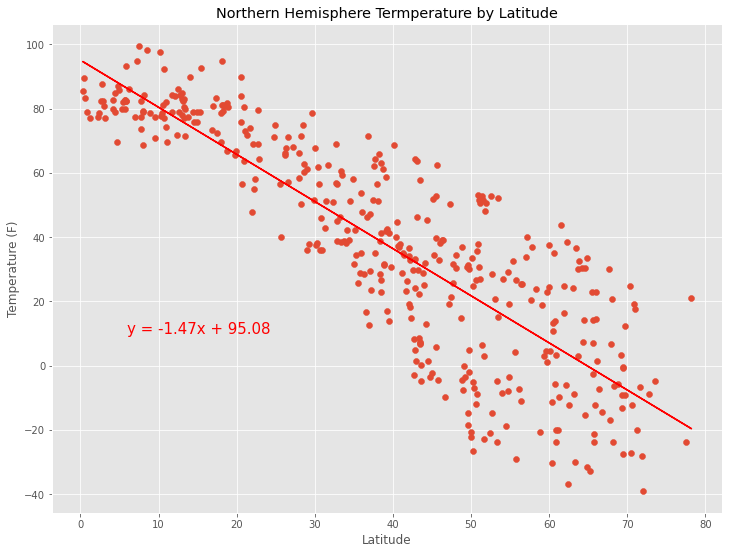

In [19]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["temperature"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Northern Hemisphere Termperature by Latitude")

plt.savefig("North Temp VS Lat Reg.png")
 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The R-value is  0.5062261628618772


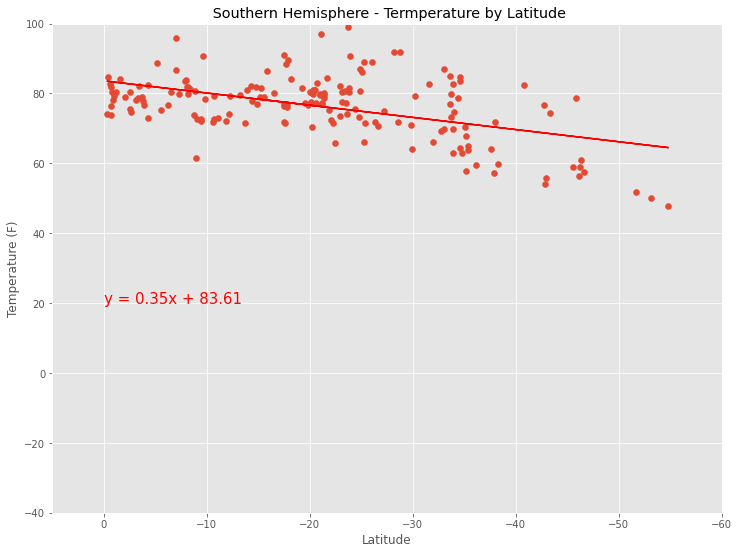

In [20]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["temperature"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f" Southern Hemisphere - Termperature by Latitude")
plt.xlim([5, -60])
plt.ylim([-40,100])

plt.savefig("South Temp VS Lat Reg.png")

In [21]:
# The first thing I noticed is that the overall correlation between temperature and latitude is stong in both the
# Northern and Southern Hemispheres, as expected.  I plotted the output on the same scale so I could better see
# any differences in the regression, as before doing so, the regression looked stonger in the Norther Hemisphere. 
# Showing the results on the same Y axix scale shows that both Norther and Southern Hemisphere correlations appear 
# equally strong.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The R-value is  0.40742102360429744


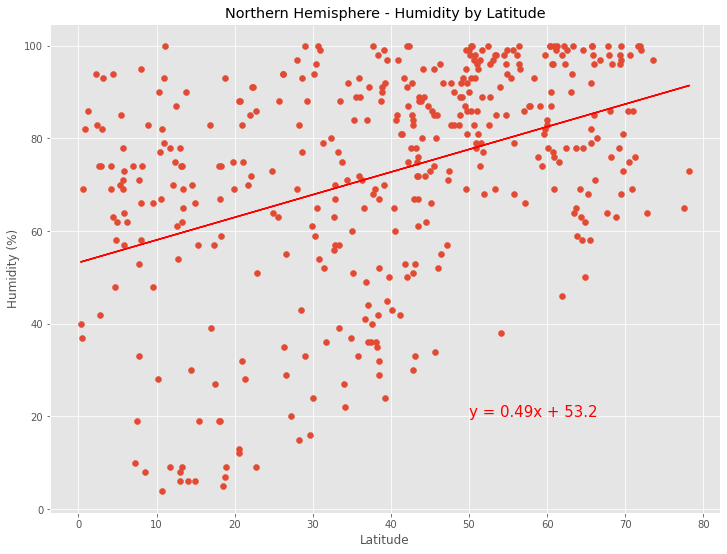

In [22]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["humidity"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)
 

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity by Latitude")

plt.savefig("North Humidity VS Lat Reg.png")
 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The R-value is  0.21988146249570845


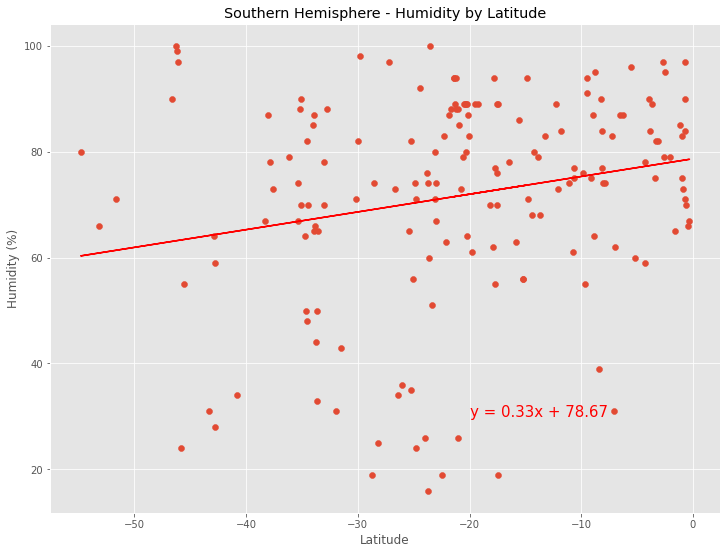

In [23]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["humidity"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)
 
# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity by Latitude")

plt.savefig("South Humidity VS Lat Reg.png")

In [24]:
# With and R-Value of .51 and .07 for the Northern and Southern Hemispheres respectively, there appears to be 
# correlation between latitude and humidity in the North but little in the South.  The higher .51 R value in the North
# as discussed above, could be explained by the fact that, given it's wintner and the cold weather season.  
# Given the potential amount of water air can hold is lower at lower temperatures, in the winter the denominator in the 
# relative humidity equation is decreasing as the latitude increases which causes the Relative Humidity numbers 
# to move toward 100% at low temperatures.  My assumption is that, if we ran this same regression in July, the Southern 
# Hemisphere's winter, we'd see the reverse of what we are seeing here, or the South correlation higher than the North.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The R-value is  0.26872279919972814


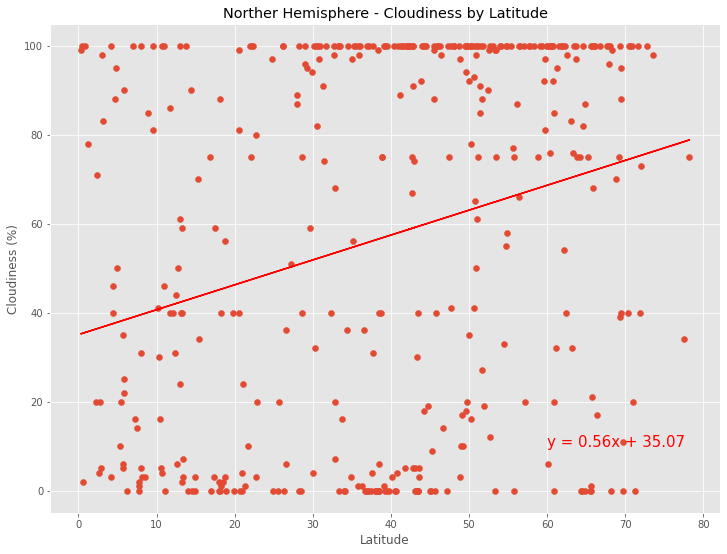

In [25]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["cloudiness"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Norther Hemisphere - Cloudiness by Latitude")

plt.savefig("North Cloud VS Lat Reg.png")
 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The R-value is  0.12727035293832456


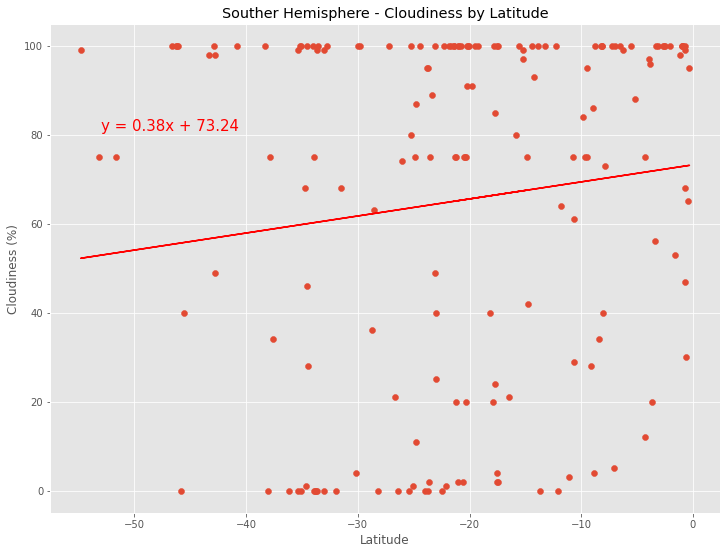

In [26]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["cloudiness"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f" The R-value is " , rvalue)
      
# Print the Regression formula()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,81),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Souther Hemisphere - Cloudiness by Latitude")

plt.savefig("South Clouds VS Lat Reg.png")

In [27]:
#  There appears to be, and the R-Values of 33 and 24 confirm that there is little or no correlation between cloudiness 
#  and latitude in either hemisphere.
#  As discussed above, there is some clustering of resulting on the boundaries given the tendencies for very high p
#  pressure days to have no clouds and very low pressure days to be 100% cloudy.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

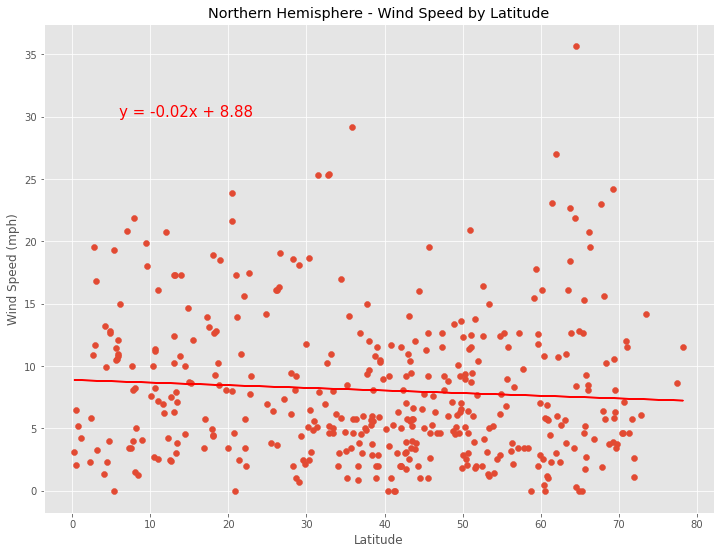

In [28]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["windspeed"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed by Latitude")

plt.savefig("North Wind VS Lat Reg.png")
 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

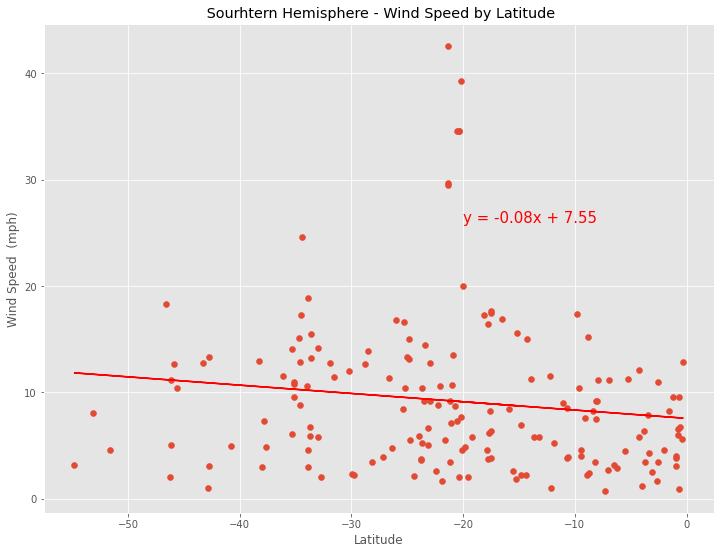

In [29]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["windspeed"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,26),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed  (mph)")
plt.title(f" Sourhtern Hemisphere - Wind Speed by Latitude")

plt.savefig("South Wind VS Lat Reg.png")

In [30]:
# There appears to be very litte correlation between Wind Speed and Latitude in either hemisphere.  Winds do tend to 
# range between 0 and 10 miles per hour in both hemispheres.